In [467]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [468]:
import warnings
warnings.filterwarnings('ignore')

In [469]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [470]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [471]:
train_C2H6

,G_A_C2H6,Re_A**2,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Cx_A_C2H6**2,G_B_C2H6
0,3.290427,1.602284e+11,-0.489581,-2.242475,0.181389,0.840950,0.239689,3.287050
1,3.359382,1.598393e+11,-0.003377,-0.194786,-0.044183,0.121399,0.000011,3.340066
2,3.705238,1.681452e+11,-0.019316,1.251283,0.124272,-0.027603,0.000373,3.281556
3,3.866684,1.731406e+11,-0.423683,-0.670212,0.196535,0.459082,0.179507,3.293440
4,3.618825,1.684547e+11,-0.573244,-2.120496,0.258850,0.865234,0.328608,3.289875
...,...,...,...,...,...,...,...,...
5793,3.554647,1.765358e+11,0.046943,-0.516086,-0.252523,0.529955,0.002204,3.573312
5794,3.564293,1.758147e+11,0.018665,0.614285,0.206822,0.863474,0.000348,3.705671
5795,3.599126,1.761351e+11,0.141378,0.987720,0.290982,1.054463,0.019988,3.782530
5796,3.643365,1.764084e+11,0.183404,0.858988,0.237820,1.026423,0.033637,3.872604


In [472]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [473]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [474]:
train_C3H8

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A**2,B_rate**2,w_prev,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,G_B_C3H8
0,71.792506,0.079057,3.290427,27.842527,12.387785,17.282650,3.278528,3.228807,3.602860,1.602284e+11,5154.163907,0.282218,5.028694,0.032902,0.707197,27.647742
1,71.939558,0.088886,3.359382,26.894371,12.322429,17.445244,3.442448,3.421856,3.995652,1.598393e+11,5175.300044,0.279957,0.037941,0.001952,0.014738,28.145653
2,72.124690,0.100583,3.705238,28.255982,12.149973,16.882631,3.206406,3.147301,3.568075,1.681452e+11,5201.970854,0.279308,1.565708,0.015444,0.000762,27.585770
3,72.278288,0.102275,3.866684,29.575965,12.056512,16.432037,2.993830,2.905301,3.089904,1.731406e+11,5224.150961,0.281090,0.449184,0.038626,0.210757,27.455469
4,72.454090,0.091003,3.618825,29.382409,12.201836,16.604850,3.013631,2.933103,3.094697,1.684547e+11,5249.595211,0.282356,4.496504,0.067003,0.748631,27.346160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.183355,0.204616,3.554647,25.749853,11.862763,17.512023,4.370529,3.980311,4.736485,1.765358e+11,5503.170119,0.284241,0.266344,0.063768,0.280852,26.364138
5794,74.213066,0.202989,3.564293,25.779263,11.818925,17.298314,4.297855,3.885339,4.968988,1.758147e+11,5507.579117,0.282492,0.377347,0.042775,0.745587,26.766983
5795,74.144367,0.199332,3.599126,26.036910,11.844345,17.235252,4.184508,3.704253,4.941684,1.761351e+11,5497.387145,0.281884,0.975590,0.084671,1.111892,26.895899
5796,74.320575,0.194431,3.643365,26.260652,11.876124,17.218604,4.124123,3.598754,4.763547,1.764084e+11,5523.547878,0.281886,0.737861,0.056559,1.053544,27.404164


In [475]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [476]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [477]:
train_iC4H10

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A**2,B_rate**2,w_prev,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,G_B_iC4H10
0,71.792506,0.079057,3.290427,27.842527,12.387785,17.282650,3.278528,3.228807,3.602860,1.602284e+11,5154.163907,0.282218,5.028694,0.032902,0.707197,12.343602
1,71.939558,0.088886,3.359382,26.894371,12.322429,17.445244,3.442448,3.421856,3.995652,1.598393e+11,5175.300044,0.279957,0.037941,0.001952,0.014738,12.446701
2,72.124690,0.100583,3.705238,28.255982,12.149973,16.882631,3.206406,3.147301,3.568075,1.681452e+11,5201.970854,0.279308,1.565708,0.015444,0.000762,12.346508
3,72.278288,0.102275,3.866684,29.575965,12.056512,16.432037,2.993830,2.905301,3.089904,1.731406e+11,5224.150961,0.281090,0.449184,0.038626,0.210757,12.315361
4,72.454090,0.091003,3.618825,29.382409,12.201836,16.604850,3.013631,2.933103,3.094697,1.684547e+11,5249.595211,0.282356,4.496504,0.067003,0.748631,12.281888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.183355,0.204616,3.554647,25.749853,11.862763,17.512023,4.370529,3.980311,4.736485,1.765358e+11,5503.170119,0.284241,0.266344,0.063768,0.280852,12.069585
5794,74.213066,0.202989,3.564293,25.779263,11.818925,17.298314,4.297855,3.885339,4.968988,1.758147e+11,5507.579117,0.282492,0.377347,0.042775,0.745587,12.109907
5795,74.144367,0.199332,3.599126,26.036910,11.844345,17.235252,4.184508,3.704253,4.941684,1.761351e+11,5497.387145,0.281884,0.975590,0.084671,1.111892,12.082166
5796,74.320575,0.194431,3.643365,26.260652,11.876124,17.218604,4.124123,3.598754,4.763547,1.764084e+11,5523.547878,0.281886,0.737861,0.056559,1.053544,12.141276


In [478]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [479]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [480]:
train_nC4H10

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A**2,B_rate**2,w_prev,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,G_B_nC4H10
0,71.792506,0.079057,3.290427,27.842527,12.387785,17.282650,3.278528,3.228807,3.602860,1.602284e+11,5154.163907,0.282218,5.028694,0.032902,0.707197,17.404049
1,71.939558,0.088886,3.359382,26.894371,12.322429,17.445244,3.442448,3.421856,3.995652,1.598393e+11,5175.300044,0.279957,0.037941,0.001952,0.014738,17.417641
2,72.124690,0.100583,3.705238,28.255982,12.149973,16.882631,3.206406,3.147301,3.568075,1.681452e+11,5201.970854,0.279308,1.565708,0.015444,0.000762,17.341714
3,72.278288,0.102275,3.866684,29.575965,12.056512,16.432037,2.993830,2.905301,3.089904,1.731406e+11,5224.150961,0.281090,0.449184,0.038626,0.210757,17.297271
4,72.454090,0.091003,3.618825,29.382409,12.201836,16.604850,3.013631,2.933103,3.094697,1.684547e+11,5249.595211,0.282356,4.496504,0.067003,0.748631,17.241454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.183355,0.204616,3.554647,25.749853,11.862763,17.512023,4.370529,3.980311,4.736485,1.765358e+11,5503.170119,0.284241,0.266344,0.063768,0.280852,18.375497
5794,74.213066,0.202989,3.564293,25.779263,11.818925,17.298314,4.297855,3.885339,4.968988,1.758147e+11,5507.579117,0.282492,0.377347,0.042775,0.745587,18.352777
5795,74.144367,0.199332,3.599126,26.036910,11.844345,17.235252,4.184508,3.704253,4.941684,1.761351e+11,5497.387145,0.281884,0.975590,0.084671,1.111892,18.261675
5796,74.320575,0.194431,3.643365,26.260652,11.876124,17.218604,4.124123,3.598754,4.763547,1.764084e+11,5523.547878,0.281886,0.737861,0.056559,1.053544,18.162638


In [481]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [482]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [483]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [484]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [485]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [486]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [487]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [488]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [489]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [490]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.36491196554358163

In [491]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.11150140510498759, max:0.22177739092871115, min:0.07584740909793491, std:0.05537198665458632


In [492]:
lr_scoring

array([0.09173091, 0.22177739, 0.08283705, 0.08531426, 0.07584741])

In [493]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.12895718589474087, max:0.23565773487768038, min:0.08061577232707348, std:0.06267601714147995


In [494]:
lr_scoring

array([0.23565773, 0.16597701, 0.08175592, 0.0807795 , 0.08061577])

### C3H8

In [495]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [496]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.904713224844944

In [497]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:1.5528456273079352, max:4.165732341541027, min:0.609475852364584, std:1.3259308669572252


In [498]:
lr_scoring

array([0.89617384, 4.16573234, 1.30058276, 0.60947585, 0.79226334])

In [499]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:1.8203486085906762, max:4.849757911310371, min:0.6586852786169314, std:1.549108693754742


In [500]:
lr_scoring

array([4.84975791, 1.29706393, 0.76452223, 1.53171369, 0.65868528])

### iC4H10

In [501]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [502]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.910980587699915

In [503]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.7130286991014823, max:2.3637078544680756, min:0.20067614310193962, std:0.8296670639481596


In [504]:
lr_scoring

array([0.2147928 , 2.36370785, 0.36658917, 0.20067614, 0.41937753])

In [505]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.37542775107395365, max:0.46708043255645604, min:0.26353002198944997, std:0.07804606266298135


In [506]:
lr_scoring

array([0.46708043, 0.30683906, 0.26353002, 0.44087436, 0.39881488])

### nC4H10

In [507]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [508]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.2199539783018187

In [509]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.740524762756628, max:2.317518472128144, min:0.28591130233509643, std:0.789183663401005


In [510]:
lr_scoring

array([0.34717783, 2.31751847, 0.37440852, 0.2859113 , 0.37760769])

In [511]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.7415594438384182, max:2.0904194714418267, min:0.26371703935993124, std:0.6790364547612568


In [512]:
lr_scoring

array([2.09041947, 0.47387434, 0.4848121 , 0.26371704, 0.39497427])

# SGDRegressor

### C2H6

In [513]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', \
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [514]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.6090886791200549

In [515]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.1463913324395813, max:0.17563649510929888, min:0.120116829360847, std:0.02417654331567326


In [516]:
SGD_scoring

array([0.12011683, 0.1756365 , 0.14308315, 0.12042682, 0.17269337])

In [517]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:0.6207291362494415, max:2.359075808875655, min:0.11302869063554571, std:0.8716513148193662


In [518]:
SGD_scoring

array([2.35907581, 0.3025416 , 0.13502575, 0.11302869, 0.19397383])

In [519]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [520]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [521]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, \
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [522]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

CPU times: user 4.41 s, sys: 35.2 ms, total: 4.45 s
Wall time: 4.49 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [523]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, penalty='l1', random_state=0,
             shuffle=False, tol=0.5)

In [524]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.15574692600002402
{'tol': 0.5, 'power_t': 0.25, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [525]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.5394453937209321

In [526]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, \
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [527]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

CPU times: user 3.4 s, sys: 26.5 ms, total: 3.43 s
Wall time: 3.45 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [528]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5)

In [529]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.2866256947986816
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [530]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.5318276922821475

# Prediction

In [531]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [532]:
test_data

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,month,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,ro_mix_A,mu_mix_A,w_A,Re_A,A_rate**2,sqrt_A_rate,e**A_rate,lg_A_rate,ln_A_rate,B_rate**2,sqrt_B_rate,e**B_rate,Re_A**2,sqrt_Re_A,lg_Re_A,ln_Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,w_prev,Cx_A_C2H6**2,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2
0,2020-04-30 23:30:00,71.730325,0.265635,5.069165,36.602453,16.649167,24.150503,5.752792,4.997528,6.459137,74.327170,4,0.190541,3.636129,26.255059,11.942501,17.323235,4.126496,3.584743,4.633160,3.817805,26.653966,11.967796,18.155783,562.972882,0.000151,0.282014,419502.620400,5145.239507,8.469376,1.419333e+31,1.855703,4.272914,5524.528145,8.621321,1.904933e+32,1.759824e+11,647.690219,5.622735,12.946825,0.229239,1.143513,0.265152,0.944034,0.281933,0.052551,1.307621,0.070306,0.891199
1,2020-05-01 00:00:00,71.428342,0.267832,5.135159,36.816480,16.632260,24.062587,5.696004,4.939430,6.395286,74.273009,5,0.191308,3.667959,26.297401,11.880148,17.187507,4.068561,3.528153,4.568047,NaN,NaN,NaN,NaN,562.574167,0.000151,0.281026,419019.690291,5102.008078,8.451529,1.049385e+31,1.853871,4.268695,5516.479837,8.618179,1.804504e+32,1.755775e+11,647.317303,5.622234,12.945673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-01 00:30:00,70.925118,0.268464,5.149646,36.869023,16.651870,24.069800,5.676384,4.911872,6.346957,74.061833,5,0.190409,3.652392,26.149398,11.810358,17.071534,4.025982,3.483751,4.501587,NaN,NaN,NaN,NaN,562.453634,0.000151,0.279106,416411.116881,5030.372300,8.421705,6.344351e+30,1.850800,4.261625,5485.155096,8.605918,1.460984e+32,1.733982e+11,645.299246,5.619522,12.939428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-01 01:00:00,70.991719,0.270641,5.154615,37.074965,16.710967,24.106152,5.574873,4.808516,6.242636,73.856268,5,0.192132,3.659350,26.320155,11.863402,17.113371,3.957698,3.413648,4.431754,NaN,NaN,NaN,NaN,562.145225,0.000151,0.279521,417597.094151,5039.824165,8.425658,6.781282e+30,1.851208,4.262563,5454.748284,8.593967,1.189514e+32,1.743873e+11,646.217529,5.620757,12.942272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-01 01:30:00,70.972406,0.275241,5.230661,37.384180,16.683337,24.021993,5.514843,4.730887,6.101647,73.750744,5,0.195345,3.712326,26.532452,11.840565,17.048987,3.914017,3.357624,4.330485,NaN,NaN,NaN,NaN,561.586475,0.000150,0.279723,419332.221124,5037.082371,8.424512,6.651570e+30,1.851090,4.262291,5439.172185,8.587825,1.070387e+32,1.758395e+11,647.558662,5.622558,12.946419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,2020-07-22 21:30:00,72.600912,0.120985,4.328092,40.875930,17.741460,24.098520,4.469224,3.619095,4.686205,75.486026,7,0.087836,3.142234,29.676298,12.880462,17.495745,3.244697,2.627496,3.402228,NaN,NaN,NaN,NaN,560.490170,0.000156,0.286701,411063.958267,5270.892458,8.520617,3.389812e+31,1.860942,4.284977,5698.140172,8.688269,6.069665e+32,1.689736e+11,641.142697,5.613909,12.926504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3981,2020-07-22 22:00:00,72.107049,0.110734,4.013567,38.871418,17.449352,24.049532,4.770699,3.988215,6.689777,75.370451,7,0.079847,2.894065,28.029033,12.582213,17.341408,3.440010,2.875784,4.823801,NaN,NaN,NaN,NaN,564.214118,0.000160,0.282871,399020.836882,5199.426559,8.491587,2.068681e+31,1.857978,4.278152,5680.704888,8.681616,5.407182e+32,1.592176e+11,631.680961,5.600996,12.896769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3982,2020-07-22 22:30:00,71.805799,0.111535,4.041506,39.794323,17.635380,24.169473,4.613603,3.790651,5.785216,74.985878,7,0.080089,2.902036,28.574632,12.663225,17.355083,3.312835,2.721907,4.154120,NaN,NaN,NaN,NaN,562.797288,0.000159,0.282399,400118.115414,5156.072701,8.473830,1.530601e+31,1.856160,4.273965,5622.881928,8.659439,3.68

In [533]:
rg_C2H6 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

SGDRegressor(random_state=0, shuffle=False)

In [534]:
for i in range(1,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-1, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-1,'G_B_C2H6'] - test_data.loc[i-1,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-1,'G_B_C3H8'] - test_data.loc[i-1,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-1,'G_B_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-1,'G_B_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(3)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(4)
    x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_iC4H10']]
    
    if np.array(x).sum() > test_data.loc[i, "B_rate"]:
        test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i-100, "G_B_C2H6"].mean()
        test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i-100, "G_B_C3H8"].mean()
        test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i-100, "G_B_iC4H10"].mean()
        test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i-100, "G_B_nC4H10"].mean()
        
    #print(i)

In [535]:
#test_data.loc[:10, "G_B_C2H6"].mean()

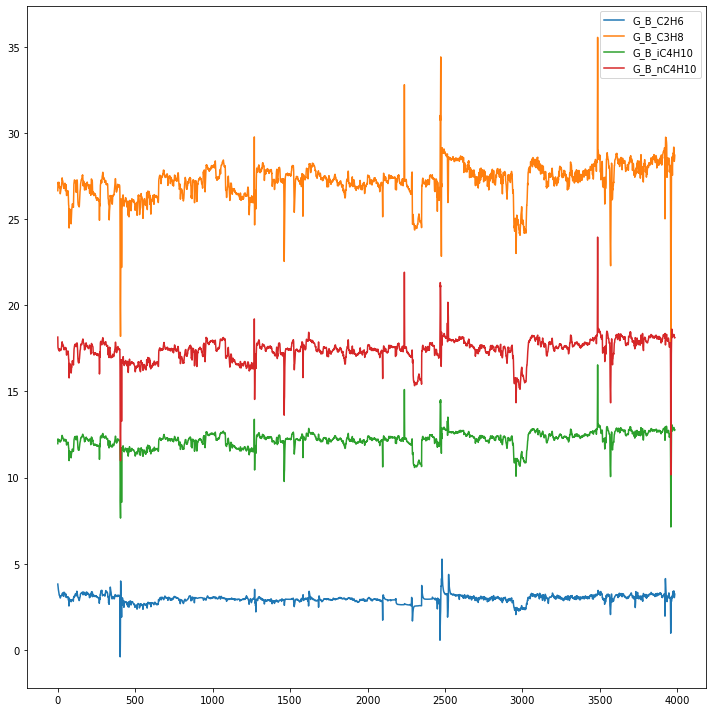

In [536]:
plt.rcParams["figure.figsize"] = (10,10)

test_data[['G_B_C2H6','G_B_C3H8','G_B_iC4H10','G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [537]:
predict = pd.DataFrame()

In [538]:
predict[['timestamp']] = test_data[['timestamp']]

In [539]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [540]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [541]:
predict = pd.concat([predict,B] , axis=1)

In [542]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-30 23:30:00,5.136487,35.860326,16.101509,24.426845
1,2020-05-01 00:00:00,5.005460,36.534989,16.488635,23.656546
2,2020-05-01 00:30:00,4.844662,36.560018,16.489698,23.665170
3,2020-05-01 01:00:00,4.748409,36.638714,16.517512,23.681882
4,2020-05-01 01:30:00,4.718339,36.740232,16.526230,23.667524
...,...,...,...,...,...
3980,2020-07-22 21:30:00,4.327626,38.360160,17.032927,24.190793
3981,2020-07-22 22:00:00,4.021365,37.624925,16.962623,24.155403
3982,2020-07-22 22:30:00,4.075533,37.908120,16.997969,24.194732
3983,2020-07-22 23:00:00,4.203098,38.154092,17.030138,24.212723


In [543]:
predict.drop(0, axis=0, inplace=True)

In [544]:
predict = predict.reset_index(drop=True)

In [545]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,5.005460,36.534989,16.488635,23.656546
1,2020-05-01 00:30:00,4.844662,36.560018,16.489698,23.665170
2,2020-05-01 01:00:00,4.748409,36.638714,16.517512,23.681882
3,2020-05-01 01:30:00,4.718339,36.740232,16.526230,23.667524
4,2020-05-01 02:00:00,4.641492,36.753554,16.518411,23.653819
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.327626,38.360160,17.032927,24.190793
3980,2020-07-22 22:00:00,4.021365,37.624925,16.962623,24.155403
3981,2020-07-22 22:30:00,4.075533,37.908120,16.997969,24.194732
3982,2020-07-22 23:00:00,4.203098,38.154092,17.030138,24.212723


In [550]:
predict.to_csv('predictSGD.csv', sep=',', header=True, index=False)

In [551]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictSGD.csv', header = 0, sep = ',')

In [552]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [553]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,5.005460,36.534989,16.488635,23.656546
1,2020-05-01 00:30:00,4.844662,36.560018,16.489698,23.665170
2,2020-05-01 01:00:00,4.748409,36.638714,16.517512,23.681882
3,2020-05-01 01:30:00,4.718339,36.740232,16.526230,23.667524
4,2020-05-01 02:00:00,4.641492,36.753554,16.518411,23.653819
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.327626,38.360160,17.032927,24.190793
3980,2020-07-22 22:00:00,4.021365,37.624925,16.962623,24.155403
3981,2020-07-22 22:30:00,4.075533,37.908120,16.997969,24.194732
3982,2020-07-22 23:00:00,4.203098,38.154092,17.030138,24.212723
